In [1]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Packages, Data, and Setup

Get the sklearn digit recognition toy dataset, it contains 1797 images.
We then take the first 1700 to be our training set and the last 97 for testing

In [2]:
# load the data set
img,label=sklearn.datasets.load_digits(return_X_y=True)
TRAIN_SIZE = 1700
# split the data set
train_img,test_img = img[:TRAIN_SIZE], img[TRAIN_SIZE:]
train_label,test_label = label[:TRAIN_SIZE], label[TRAIN_SIZE:]

As can be observed, each of these train img is an 8x8 pixel grayscale image of a handwritten digit, 
for instance training image number 47 is of the handwritten digit '1'. 
We can also verify that the label in the dataset is indeed 1.

In [3]:
IMG_DIM = (8,8)

label in the dataset is 1


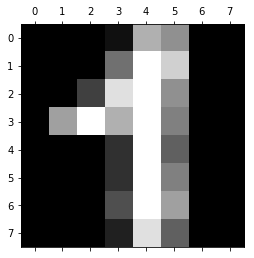

In [4]:
# Try it yourself with any index!
img_idx = 47
plt.matshow(np.reshape(train_img[img_idx],IMG_DIM),cmap='gray')
print('label in the dataset is '+str(train_label[img_idx]))

# 2. The Perceptron

In [5]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
# tanh Activation Function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / ( np.exp(x) + np.exp(-x))

In [7]:
# Linear Activation Function
def linear(x):
    return x

In [8]:
# Perceptron Class
class Perceptron(object):
    # Initialize the perceptron
    def __init__(self, function=linear, dim_input=8*8, dim_out=10):
        self.w = [np.zeros(dim_input) for ii in range(dim_out)]
        self.f = function
        self.dim_input = dim_input # dimension of the input (8*8 for our images)
        self.dim_out = dim_out # dimension of the output, 10 for the digits 0,1,..,9
    
    def predict(self,input_array):
        # See the "learning: Multiclass Perceptron" slides: w_y * f(x)
        z = np.matmul(self.w,self.f(input_array))
        # The arg max
        y = np.argmax(z)
        return y,z
        
    def one_update(self,input_array,label):
        y,z = self.predict(input_array)
        if y == label:
            # Do absolutely nothing
            noiceeee = 1
        else:
            # Updates, see the "learning: Multiclass Perceptron" slides
            fx = self.f(input_array)
            self.w[y] = self.w[y] - fx           # lower wrong answer
            self.w[label] = self.w[label] + fx   # raise right answer 
                    
    def train(self, training_inputs, labels):
        # for every img label pair in the training set
        # perform an update to perceptron
        for input_array,label in zip(training_inputs,labels):
            self.one_update(input_array,label)
    
    def test(self, testing_inputs, labels):
        # number of correct predictions
        count_correct = 0
        # a list of the predicted labels the same order as the input 
        pred_list = []
        for test_array, label in zip(testing_inputs,labels):
            # Does the predicted label match the actual label?
            # Update "count_correct" and "pred_list"!
            y,z = self.predict(test_array)
            count_correct += int(y == label)
            pred_list.append(y)

        accuracy = float(count_correct)/len(test_label)
        print('Accuracy is '+str(accuracy))
        return np.asarray(pred_list)

## 2.1 Testing the Perceptron

In [9]:
# Number of epochs (iterations over the training set)
NUM_EPOCH = 6

In [10]:
# Try the perceptron with sigmoid activation
perceptron = Perceptron(function=sigmoid)
for ii in range(NUM_EPOCH):
    perceptron.train(train_img , train_label) # Censored! 
print('For sigmoid activation and '+str(NUM_EPOCH)+' epochs')
pred_array = perceptron.test(test_img ,test_label ) # Censored! 

For sigmoid activation and 6 epochs
Accuracy is 0.8247422680412371


In [11]:
# Try the perceptron with tanh activation
perceptron = Perceptron(function=tanh)
for ii in range(NUM_EPOCH):
    perceptron.train(train_img ,train_label ) # Censored! 
print('For tanh activation and '+str(NUM_EPOCH)+' epochs')
pred_array = perceptron.test(test_img , test_label) # Censored! 

For tanh activation and 6 epochs
Accuracy is 0.8556701030927835


In [12]:
# Try the perceptron with linear activation
perceptron = Perceptron(function=linear)
for ii in range(NUM_EPOCH):
    perceptron.train(train_img ,train_label ) # Censored! 
print('For linear activation and '+str(NUM_EPOCH)+' epochs')
pred_array = perceptron.test(test_img ,test_label ) # Censored! 

For linear activation and 6 epochs
Accuracy is 0.9381443298969072


## 2.2 Analysis of the results

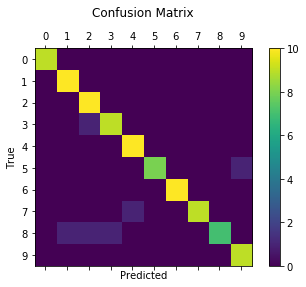

In [13]:
#########################################################################################
# Confusion matrix shows what we predicted vs what was the real (True) label.
# A perfect classifier will have has non zero elements only in the diagonal (why??)
# Look at the results outside the diagonal, does it make sense that these mistakes happened?
confusion_mat = confusion_matrix(test_label, pred_array, labels=range(0,10))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(confusion_mat)
plt.title('Confusion Matrix\n')
fig.colorbar(cax)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
# Note the perceptron seems to have misclassified some 3s as 8s, these digits do look similar  
# so this is to be expected.. what else did we misclassify?

#1s and 8s
#2s and 3s
#2s and 8s
#3s and 8s
#4s and 7s
#5s and 9s


# 3. Off the shelf classifiers 
While it is important that you are able to implement classifiers yourself, 
it is also importent that you learn how to utilize existing packadges and
off the shelf methods

In [15]:
#########################################################################################
# Import the sklearn packadge, it contains many relevent useful algorithm implementations
# and datasets (like the one we are using)
from sklearn import tree
from sklearn import naive_bayes
from sklearn import linear_model

In [16]:
# Decision tree classifiers, what is the best accuracy you can get?
decision_tree_classifier = sklearn.tree.DecisionTreeClassifier()
decision_tree_classifier.fit(train_img ,train_label ) # Censored!
print('For sklearn decision tree classifier accuracy is:')
print(decision_tree_classifier.score(test_img ,test_label )) # Censored! 

For sklearn decision tree classifier accuracy is:
0.865979381443299


In [17]:
# Naive Bayes classifiers, what is the best accuracy you can get?
naive_bayes_classifier = sklearn.naive_bayes.BernoulliNB()
naive_bayes_classifier.fit(train_img ,train_label ) # Censored! 
print('For sklearn naive bayes classifier accuracy is:')
print(naive_bayes_classifier.score(test_img ,test_label )) # Censored! 

For sklearn naive bayes classifier accuracy is:
0.7938144329896907


In [18]:
# Finally there is even a perceptron classifier, how does it do compare to your implementation?
perceptron_classifier = sklearn.linear_model.Perceptron(max_iter=NUM_EPOCH)
perceptron_classifier.fit(train_img ,train_label ) # Censored! 
print('For sklearn perceptron classifier accuracy is:')
print(perceptron_classifier.score(test_img ,test_label )) # Censored! 
print("this is same accuracy as linear activation function of my implementation")

For sklearn perceptron classifier accuracy is:
0.9381443298969072
this is same accuracy as linear activation function of my implementation


/Users/nicwiggins/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


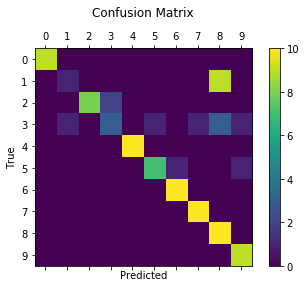

In [19]:
###############################################
#  How does the decision tree Confusion matrix look like?
pred_array = naive_bayes_classifier.predict(test_img)
#pred_array = decision_tree_classifier.predict(test_img)
#pred_array = perceptron_classifier.predict(test_img)
confusion_mat = confusion_matrix(test_label, pred_array, labels=range(0,10))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(confusion_mat)
plt.title('Confusion Matrix\n')
fig.colorbar(cax)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()